<a href="https://www.kaggle.com/code/bsrsrc/ab-testing-cookie-cats?scriptVersionId=181152859" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<div class="alert alert-primary" style="margin-top: 20px">


<h1><center>AB Testing Cookie Cats</center></h1>

</div>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest


In [2]:
df_ = pd.read_csv("/kaggle/input/mobile-games-ab-testing-cookie-cats/cookie_cats.csv")
df = df_.copy()
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
df.loc[(df["version"] == "gate_30"), "sum_gamerounds"].sort_values(ascending=False).head()
df.loc[(df["version"] == "gate_40"), "sum_gamerounds"].sort_values(ascending=False).head()

57702    49854
7912      2961
43671     2438
46344     2251
87007     2156
Name: sum_gamerounds, dtype: int64

29417    2640
48188    2294
36933    2124
88328    2063
6536     2015
Name: sum_gamerounds, dtype: int64

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='version', ylabel='sum_gamerounds'>

Text(0.5, 0, 'Version')

Text(0, 0.5, 'Mean Sum Gamerounds')

Text(0.5, 1.0, 'Mean Sum Gamerounds by Version')

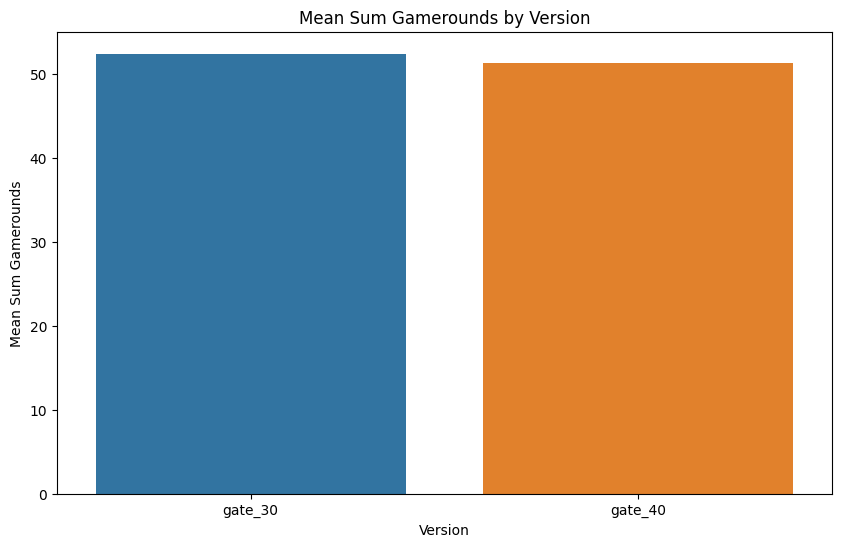

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(x="version", y="sum_gamerounds", data=df, ci=None)
plt.xlabel("Version")
plt.ylabel("Mean Sum Gamerounds")
plt.title("Mean Sum Gamerounds by Version")
plt.show()

---
Define the hypothesis.
---
* H0 = M1 = M2 (There is no statistically significant difference between the version gate_30 and version test_40.)

* H1 = M1 != M2 (There is a statistically significant difference between the version gate_30 and version test_40.)

---

In [5]:
df.groupby("version")["sum_gamerounds"].mean()

version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

In [6]:
test_stat, pvalue = shapiro(df["version"] == "gate_30")
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 0.6371, p-value = 0.0000


---
* H0 = The normality assumption is met.

* H1 = The normality assumption is not met.
---
* p-value < 0.05, reject H0

* p-value > 0.05, cannot reject H0.
---

Since the p-value is smaller than 0.05, H0 can be rejected.

---

In [7]:
test_stat, pvalue = mannwhitneyu(df.loc[df["version"] == "gate_30", "sum_gamerounds"],
                                 df.loc[df["version"] == "gate_40", "sum_gamerounds"])
print("Test Stat = %.4f, p-value = %.4f" % (test_stat, pvalue))

Test Stat = 1024331250.5000, p-value = 0.0502


---
* p-value < 0.05, reject H0

* p-value > 0.05, cannot reject H0.
---
Since the p-value is greater than 0.05, H0 cannot be rejected. Therefore, there is no statistically significant difference between the version gate_30 and version gate_40.

---